# Notebook Imports

In [1]:
import kaggle
from kaggle.api.kaggle_api_extended import KaggleApi

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
import plotly.offline as pyo

from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from sklearn.linear_model import LinearRegression

import warnings
warnings.filterwarnings("ignore")

sns.set_theme(style = "white", font = "Verdana", font_scale = 0.8, palette = "colorblind")

In [2]:
#Calling API
api = KaggleApi()
api.authenticate()

#Downloading the dataset from kaggle
api.dataset_download_file(dataset = 'berkeleyearth/climate-change-earth-surface-temperature-data',
                          file_name = 'GlobalLandTemperaturesByCountry.csv')

False

## Veriyi Isleme

In [3]:
df = pd.read_csv('GlobalLandTemperaturesByCountry.csv')

df.info

<bound method DataFrame.info of                 dt  AverageTemperature  AverageTemperatureUncertainty  \
0       1743-11-01               4.384                          2.294   
1       1743-12-01                 NaN                            NaN   
2       1744-01-01                 NaN                            NaN   
3       1744-02-01                 NaN                            NaN   
4       1744-03-01                 NaN                            NaN   
...            ...                 ...                            ...   
577457  2013-05-01              19.059                          1.022   
577458  2013-06-01              17.613                          0.473   
577459  2013-07-01              17.000                          0.453   
577460  2013-08-01              19.759                          0.717   
577461  2013-09-01                 NaN                            NaN   

         Country  
0          Åland  
1          Åland  
2          Åland  
3          Ålan

In [4]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
Country                           object
dtype: object

In [5]:
df.isna().sum()

dt                                   0
AverageTemperature               32651
AverageTemperatureUncertainty    31912
Country                              0
dtype: int64

In [6]:
df[df.isna().any(axis = 1)]

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
1,1743-12-01,NaN,NaN,Åland
2,1744-01-01,NaN,NaN,Åland
3,1744-02-01,NaN,NaN,Åland
4,1744-03-01,NaN,NaN,Åland
9,1744-08-01,NaN,NaN,Åland
...,...,...,...,...
575800,1875-04-01,NaN,NaN,Zimbabwe
575852,1879-08-01,NaN,NaN,Zimbabwe
575853,1879-09-01,NaN,NaN,Zimbabwe
575854,1879-10-01,NaN,NaN,Zimbabwe


In [7]:
df.dropna(inplace = True)

In [8]:
df.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
Country                          0
dtype: int64

In [9]:
df["dt"] = pd.to_datetime(df["dt"])

In [10]:
df.dtypes

dt                               datetime64[ns]
AverageTemperature                      float64
AverageTemperatureUncertainty           float64
Country                                  object
dtype: object

In [11]:
x = df[df['Country'] == 'Turkey']

x

,dt,AverageTemperature,AverageTemperatureUncertainty,Country
533683,1777-02-01,3.000,3.314,Turkey
533685,1777-04-01,7.678,2.553,Turkey
533686,1777-05-01,15.293,3.189,Turkey
533687,1777-06-01,18.661,2.993,Turkey
533688,1777-07-01,20.757,2.643,Turkey
...,...,...,...,...
536517,2013-04-01,12.102,0.259,Turkey
536518,2013-05-01,17.522,0.360,Turkey
536519,2013-06-01,20.862,0.240,Turkey
536520,2013-07-01,23.335,0.281,Turkey


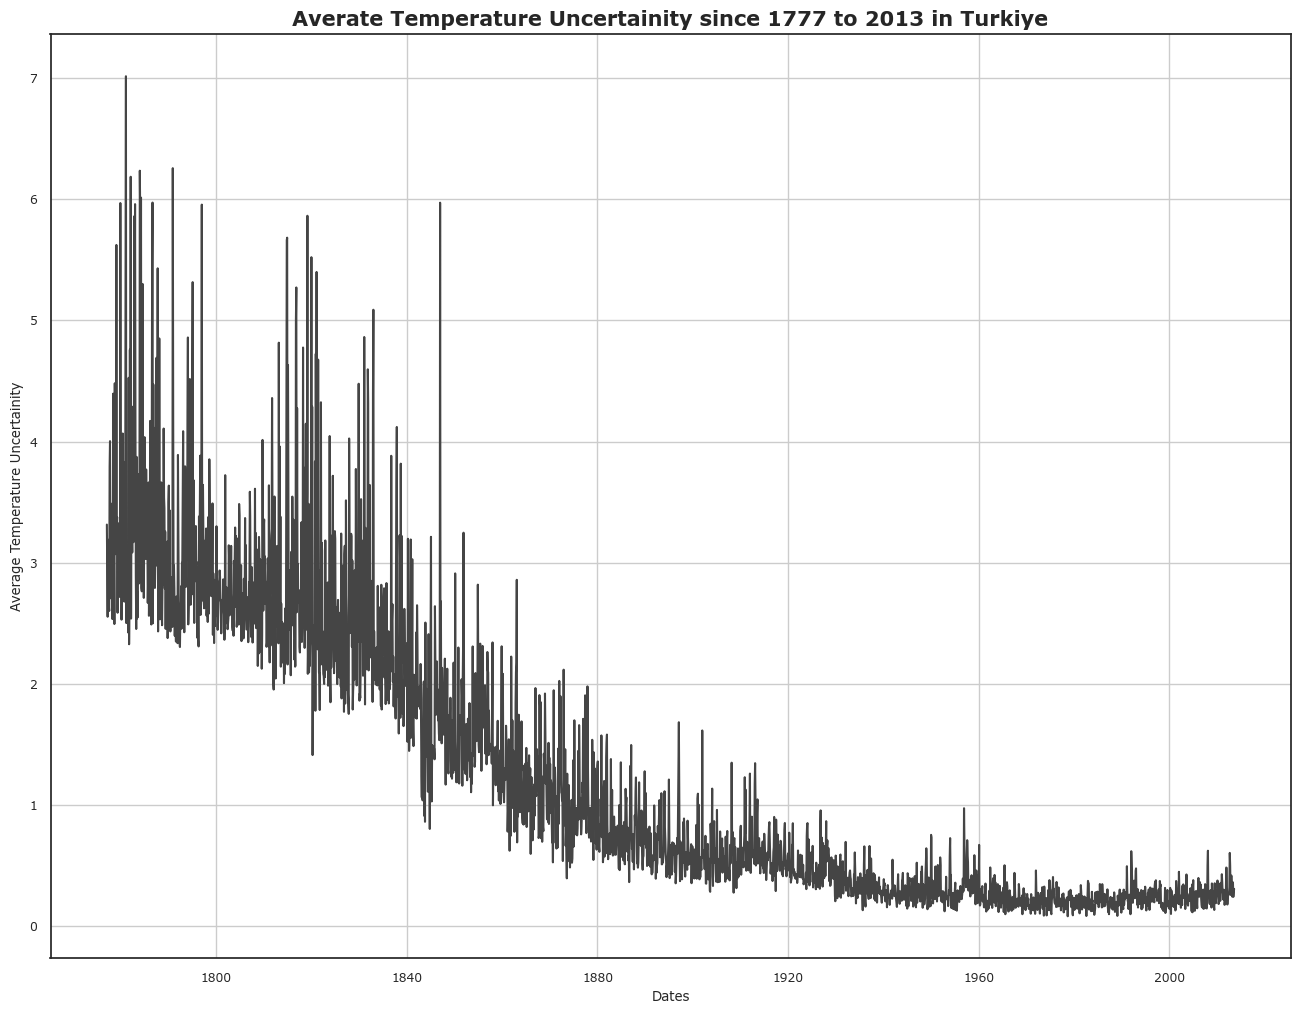

In [12]:
plt.figure( figsize = (16, 12) )

sns.lineplot(x = 'dt', y = 'AverageTemperatureUncertainty', data = x, color = '#454545')
plt.title("Averate Temperature Uncertainity since 1777 to 2013 in Turkiye", weight = 'bold', fontsize = 15)
plt.xlabel("Dates")
plt.ylabel("Average Temperature Uncertainity")

plt.grid()
plt.show()

In [13]:
df_ = df.set_index('dt')
df_ = df_[df_['Country'] == 'Turkey']
df_ = df_[df_.index.year >= 1920]

In [14]:
round(df_.describe(), 2)

,AverageTemperature,AverageTemperatureUncertainty
count,1124.00,1124.00
mean,12.02,0.29
std,7.92,0.13
min,-3.95,0.08
25%,4.59,0.20
50%,12.19,0.26
75%,19.44,0.34
max,26.27,0.97


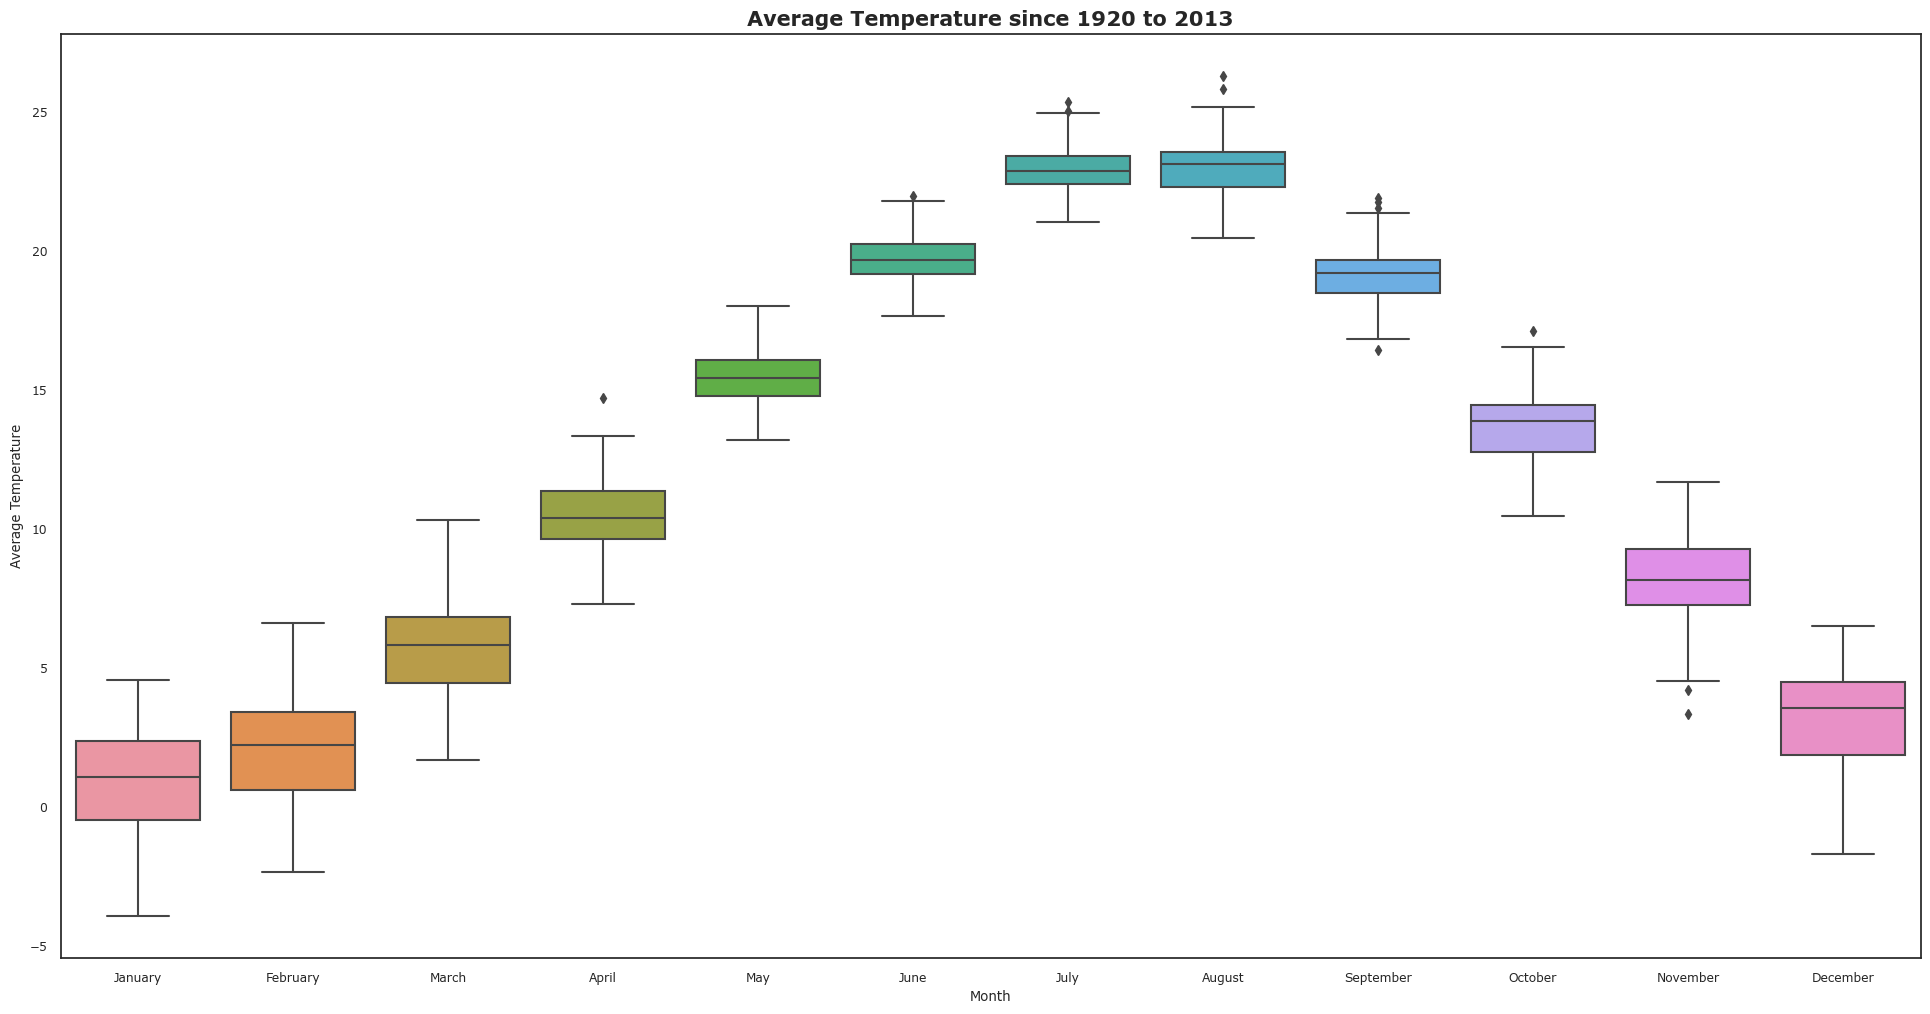

In [15]:
_, ax = plt.subplots(figsize=(24,12))

sns.boxplot(x = df_.index.month_name(), y = df_.values[:, 0], ax = ax)
plt.title('Average Temperature since 1920 to 2013', weight = 'bold', fontsize = 15)
plt.xlabel('Month')
plt.ylabel('Average Temperature')

plt.show()

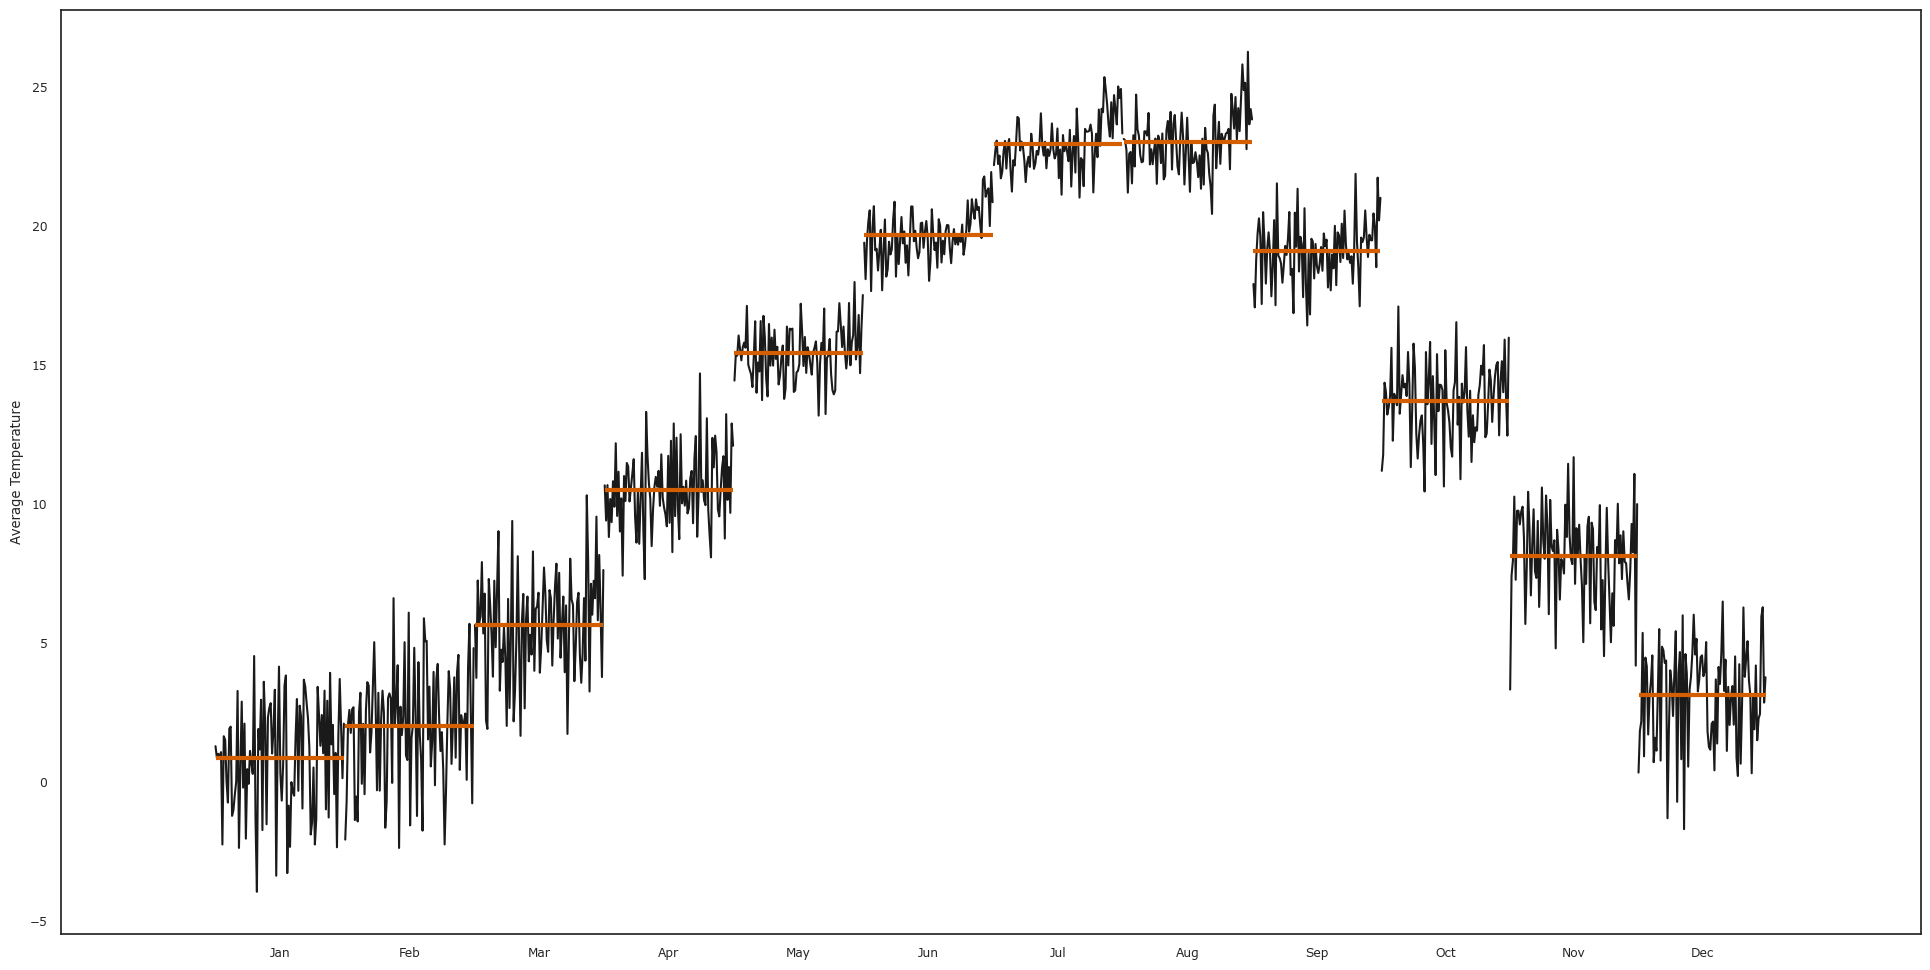

In [16]:
from statsmodels.graphics.tsaplots import month_plot

df__ = df_.drop(['AverageTemperatureUncertainty', 'Country'], axis = 1)

fig, ax = plt.subplots(figsize = (24,12))

month_plot(df__, ylabel = 'Average Temperature', ax = ax)

plt.show()

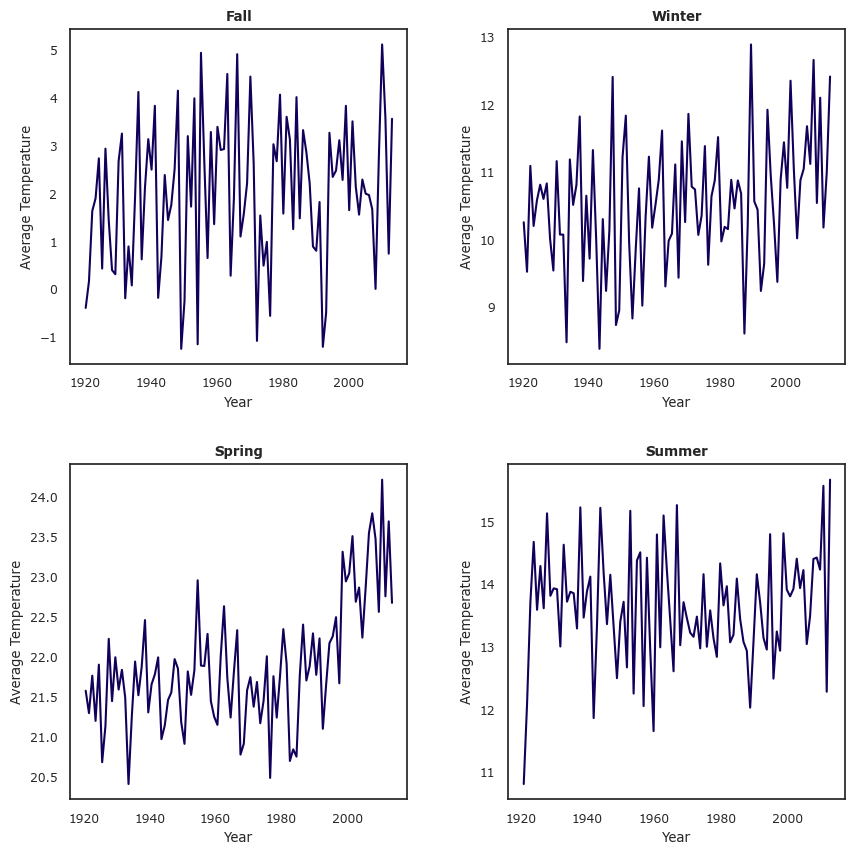

In [17]:
df_seasonal = df__.resample('Q-NOV').mean()

fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (10,10))
fig.subplots_adjust(hspace = 0.3, wspace = 0.3)
axs = axs.ravel()

for i, season in enumerate(['Fall','Winter','Spring','Summer']):
    ax = axs[i]
    ax.plot(df_seasonal.loc[df_seasonal.index.quarter == (i+1), :], color = '#13005A')
    ax.set_title(season, weight = 'bold')
    ax.set_ylabel('Average Temperature')
    ax.set_xlabel('Year')

plt.show()

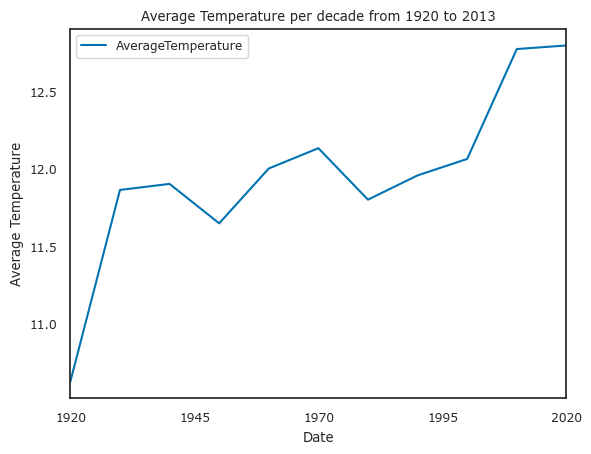

In [18]:
df_decade = df__.resample('10Y').mean()
df_decade.plot()
plt.title('Average Temperature per decade from 1920 to 2013')
plt.xlabel('Date')
plt.ylabel('Average Temperature')
plt.show()

In [19]:
winter = df__[(df__.index.month >= 12) | (df__.index.month <= 2)]

In [20]:
df__x = winter.groupby(winter.index.year).mean().rename(columns = {'AverageTemperature':'Mean'})
df__y = winter.groupby(winter.index.year).std().rename(columns = {'AverageTemperature':'Std'})
df__x = df__x.merge(df__y, left_index = True,
                    right_index = True)
df__x['Cov_pct'] = ((df__x['Std'] / df__x['Mean']) * 100).round(2)

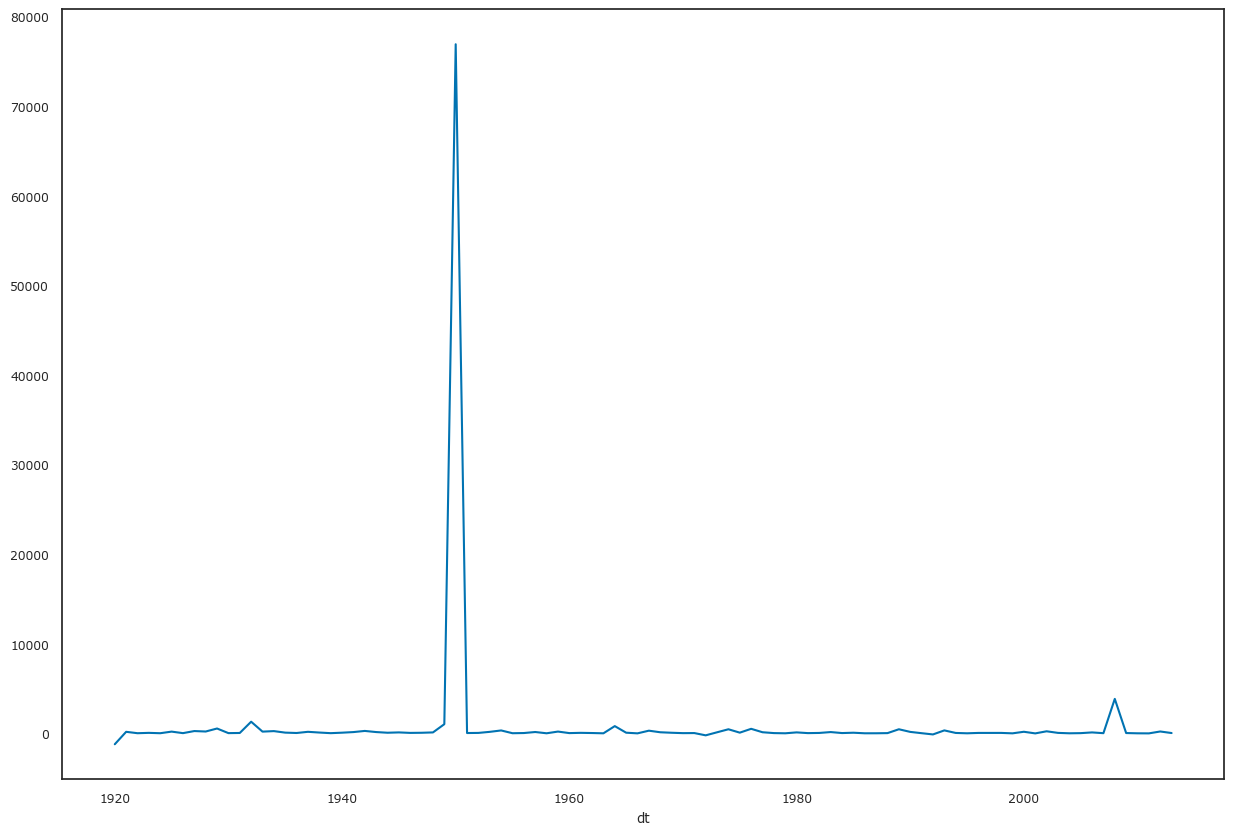

In [21]:
fig, ax = plt.subplots(figsize = (15,10))
df__x['Cov_pct'].plot()
plt.show()

In [22]:
spring = df__[(df__.index.month >= 3) | (df__.index.month <= 5)]

In [23]:
df__x = spring.groupby(spring.index.year).mean().rename(columns = {'AverageTemperature':'Mean'})
df__y = spring.groupby(spring.index.year).std().rename(columns = {'AverageTemperature':'Std'})
df__x = df__x.merge(df__y, left_index = True,
                    right_index = True)
df__x['Cov_pct'] = ((df__x['Std'] / df__x['Mean']) * 100).round(2)

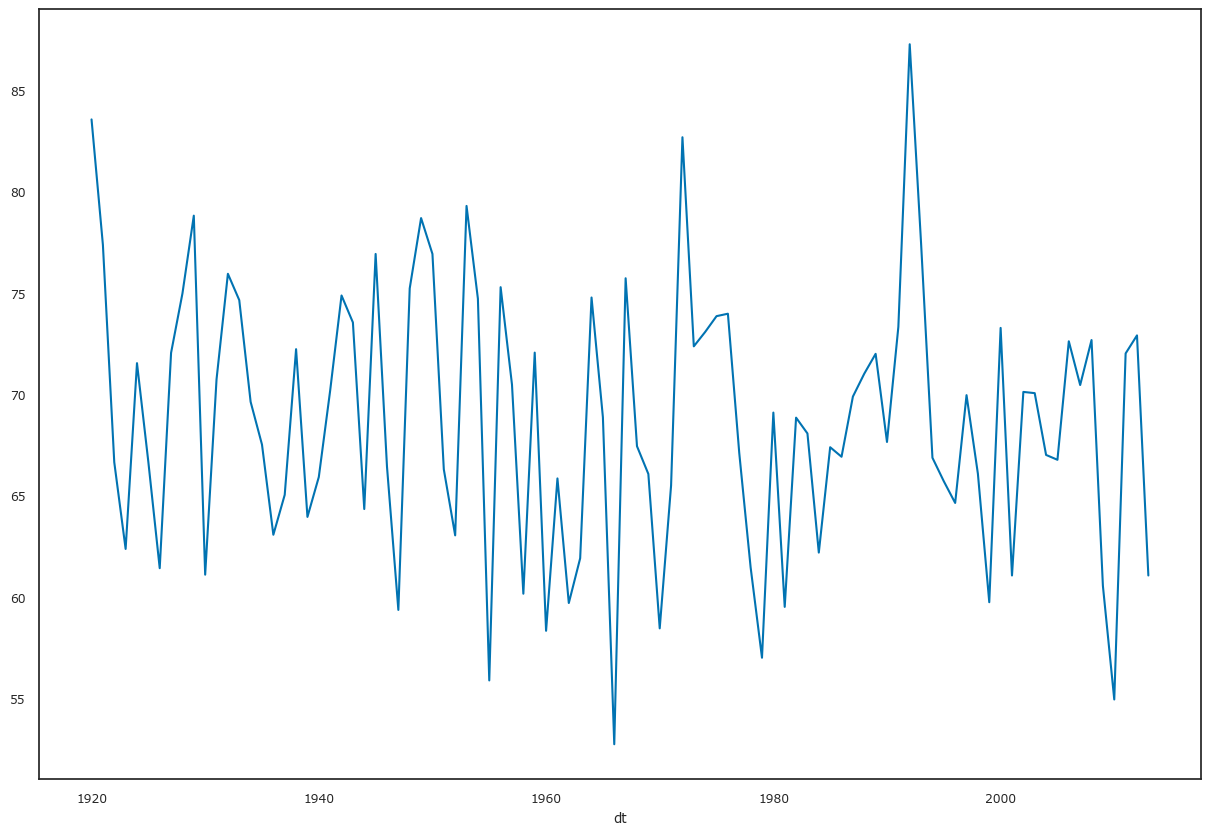

In [24]:
fig, ax = plt.subplots(figsize = (15,10))
df__x['Cov_pct'].plot()
plt.show()

In [25]:
train = df__x[df__x.index <= 2005]
test = df__x[df__x.index >= 2005]

In [26]:
print(train.shape)
print(test.shape)

(86, 3)
(9, 3)


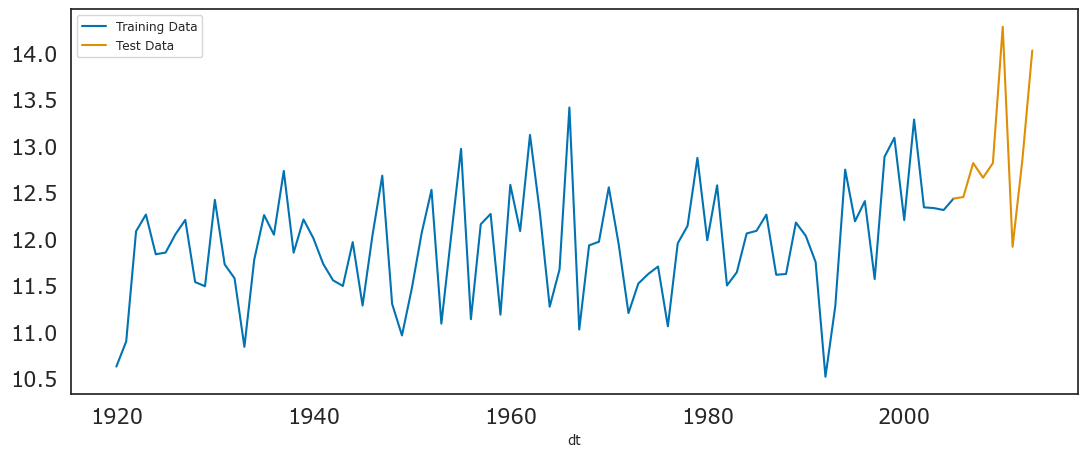

In [27]:
train['Mean'].plot(figsize = (13,5), fontsize = 15)
test['Mean'].plot(figsize = (13,5), fontsize = 15)

plt.legend(['Training Data', 'Test Data'])
plt.show()

In [28]:
train_time = [i + 1 for i in range(len(train))]
test_time = [i + len(train) + 1 for i in range(len(test))]

len(train_time), len(test_time)

(86, 9)

In [29]:
LR_train = train.copy()
LR_test = test.copy()

In [30]:
LR_train['dt'] = train_time
LR_test['dt'] = test_time

In [31]:
lr = LinearRegression()
lr.fit(LR_train[['dt']], LR_train['Mean'].values)

LinearRegression()

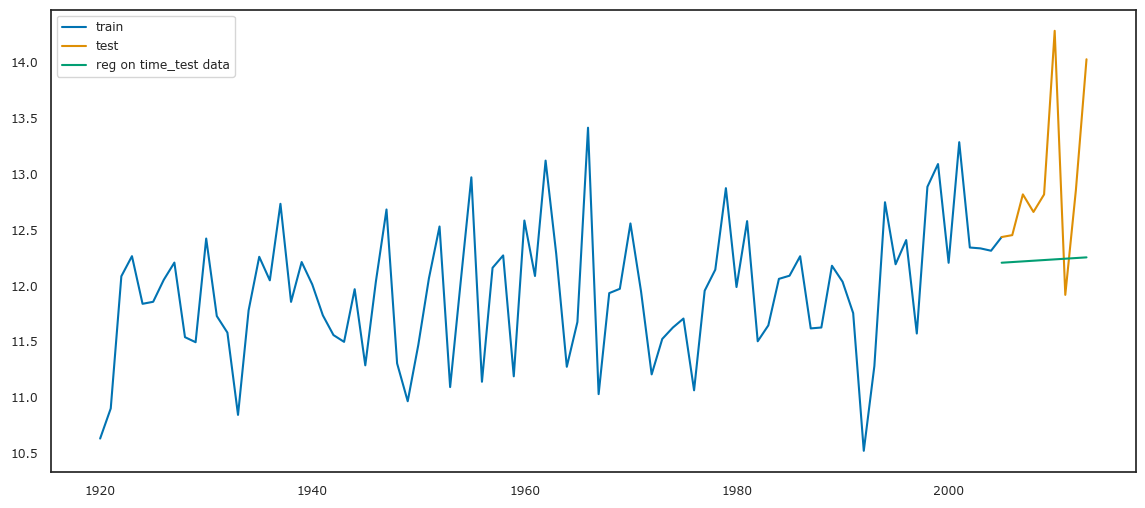

In [32]:
test_predictions_model1 = lr.predict(LR_test[['dt']])
LR_test['forecast'] = test_predictions_model1

plt.figure( figsize = (14,6) )

plt.plot(train['Mean'], label = 'train')
plt.plot(test['Mean'], label = 'test')
plt.plot(LR_test['forecast'], label = 'reg on time_test data')
plt.legend(loc = 'best')

plt.show()

In [33]:
def mape(actual, pred): 
    return round((np.mean(abs(actual - pred) / actual)) * 100, 2)

In [34]:
mape_model1_test = mape(test['Mean'].values, test_predictions_model1)

print('MAPE is %3.3f'%(mape_model1_test), '%')

MAPE is 5.670 %


In [35]:
results = pd.DataFrame({'Test MAPE(%)': [mape_model1_test]}, index = ['RegressionOnTime'])
results

,Test MAPE(%)
RegressionOnTime,5.67


In [36]:
Naive_train = train.copy()
Naive_test = test.copy()

In [37]:
Naive_test['naive'] = np.asarray(train['Mean'])[len(np.asarray(train['Mean'])) - 1]
Naive_test['naive'].head()

dt
2005    12.432917
2006    12.432917
2007    12.432917
2008    12.432917
2009    12.432917
Name: naive, dtype: float64

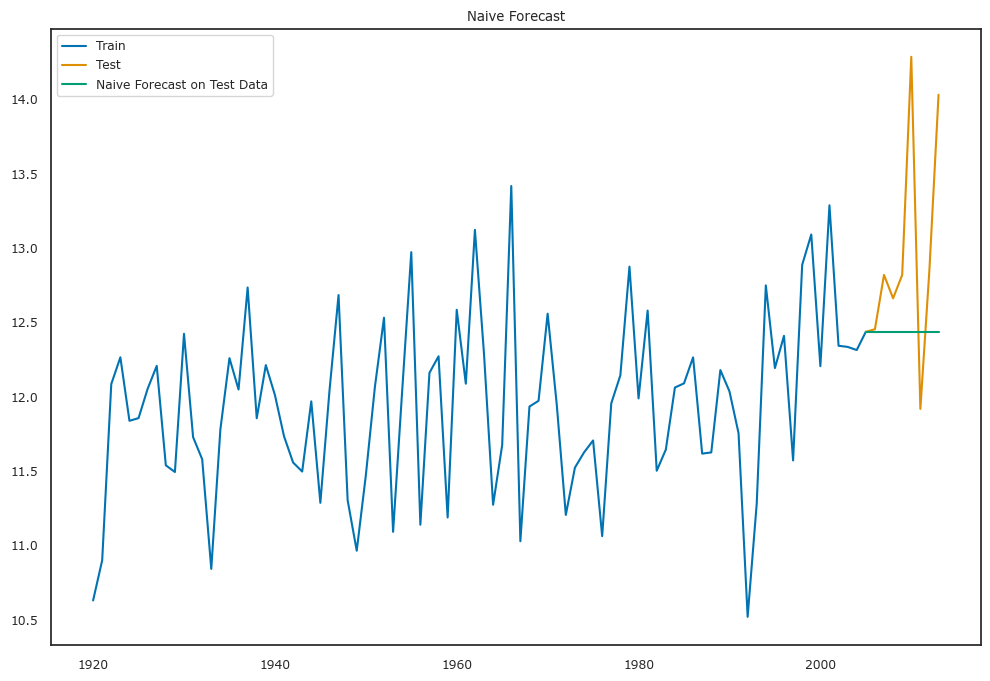

In [38]:
plt.figure(figsize = (12,8))
plt.plot(Naive_train['Mean'], label = 'Train')
plt.plot(test['Mean'], label = 'Test')
plt.plot(Naive_test['naive'], label = 'Naive Forecast on Test Data')
plt.legend(loc = 'best')
plt.title('Naive Forecast')

plt.show()

In [39]:
mape_model2_test = mape(test['Mean'].values, Naive_test['naive'].values)
print('For Naive forecast on the Test Data, MAPE is %3.3f' %(mape_model2_test), '%')

For Naive forecast on the Test Data, MAPE is 4.420 %


In [40]:
results_2 = pd.DataFrame({'Test MAPE(%)': [mape_model2_test]}, index = ['NaiveModel'])
results = pd.concat([results, results_2])
results

,Test MAPE(%)
RegressionOnTime,5.67
NaiveModel,4.42


In [62]:
final_model = ExponentialSmoothing(df_seasonal,
                                 trend = 'additive',
                                 seasonal = 'additive').fit(smoothing_level = 0.4,
                                                           smoothing_trend = 0.3,
                                                           smoothing_seasonal = 0.6)

In [63]:
Mape_final_model = mape(df_seasonal['AverageTemperature'].values, final_model.fittedvalues)
print('MAPE:', Mape_final_model)

MAPE: 83.73


In [68]:
predictions = final_model.forecast(steps=len(test))
predictions

2013-11-30    15.076726
2014-02-28     2.541457
2014-05-31    11.385216
2014-08-31    24.060533
2014-11-30    14.812240
2015-02-28     2.276970
2015-05-31    11.120730
2015-08-31    23.796047
2015-11-30    14.547754
Freq: Q-NOV, dtype: float64

In [71]:
pred_df = pd.DataFrame({'lower_CI': predictions - 1.96 * np.std(final_model.resid),
                        'prediction': predictions,
                        'upper_CI': predictions + 1.96 * np.std(final_model.resid)
                       })



(9, 3)

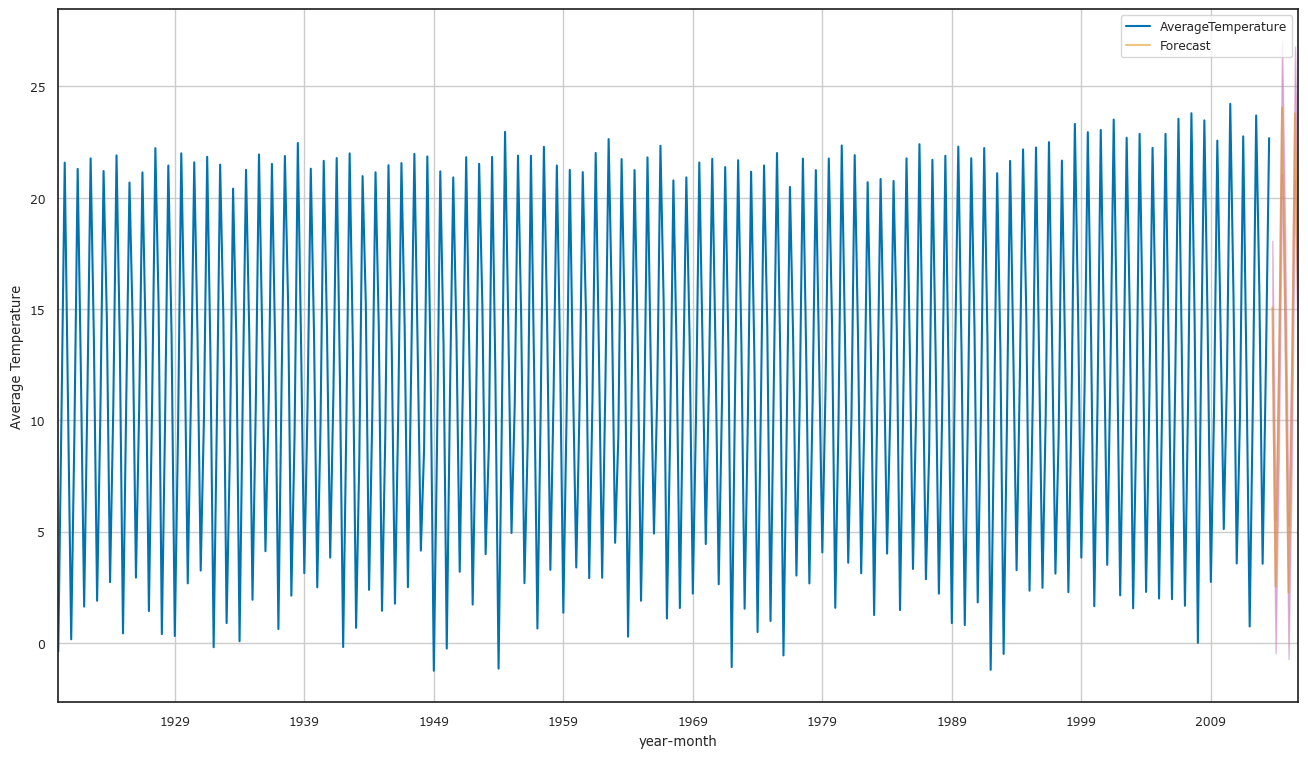

In [73]:
axis = df_seasonal.plot(label = 'Actual', figsize=(16,9))
pred_df['prediction'].plot(ax = axis, label = 'Forecast', alpha = 0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_CI'], color = 'm', alpha = 0.5)
axis.set_xlabel('year-month')
axis.set_ylabel('Average Temperature')
plt.legend(loc = 'best')
plt.grid()
plt.show()